In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#df.to_csv('Cement_data.csv')

In [5]:
df.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
col_names=df.columns.tolist()

In [20]:
n=col_names[0].split('(')[0]
n

'Cement'

In [21]:
new_cols=[i.split('(')[0].strip() for i in col_names]

In [22]:
new_cols

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age',
 'Concrete compressive strength']

In [23]:
df.columns=new_cols

In [24]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [25]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [29]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [31]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [32]:
df.duplicated().sum()

25

In [33]:
# there are 25 duplicated values

In [36]:
df[df.duplicated()==True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [37]:
# Dropping Duplicated values by keeping first values

In [39]:
df.drop_duplicates(keep='first', inplace=True)

In [41]:
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1005 non-null   float64
 1   Blast Furnace Slag             1005 non-null   float64
 2   Fly Ash                        1005 non-null   float64
 3   Water                          1005 non-null   float64
 4   Superplasticizer               1005 non-null   float64
 5   Coarse Aggregate               1005 non-null   float64
 6   Fine Aggregate                 1005 non-null   float64
 7   Age                            1005 non-null   int64  
 8   Concrete compressive strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [43]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [44]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [45]:
# There is problem with the index values as daframe has 1005 rows but the last index is 1029

In [46]:
# reseting the index
df.reset_index(drop=True,inplace=True)

In [47]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [48]:
#Plotting data for the visulization

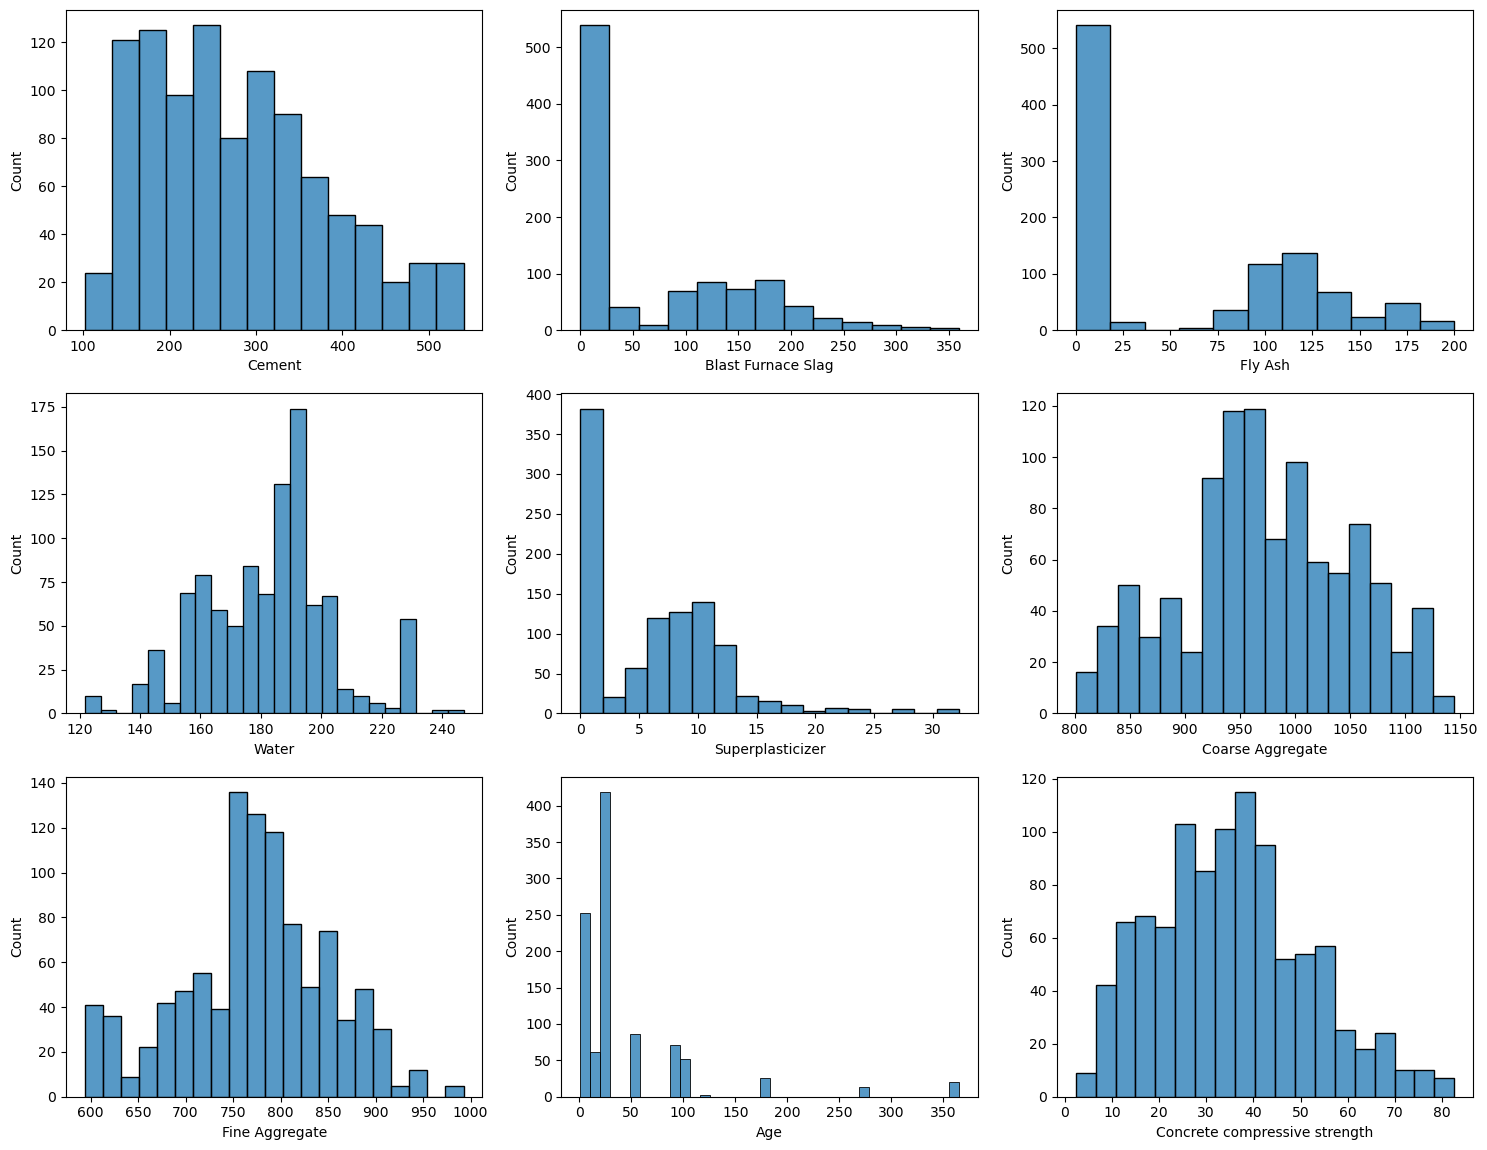

In [52]:
plt.figure(figsize=(15,15))

plotnumber=1

for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anac

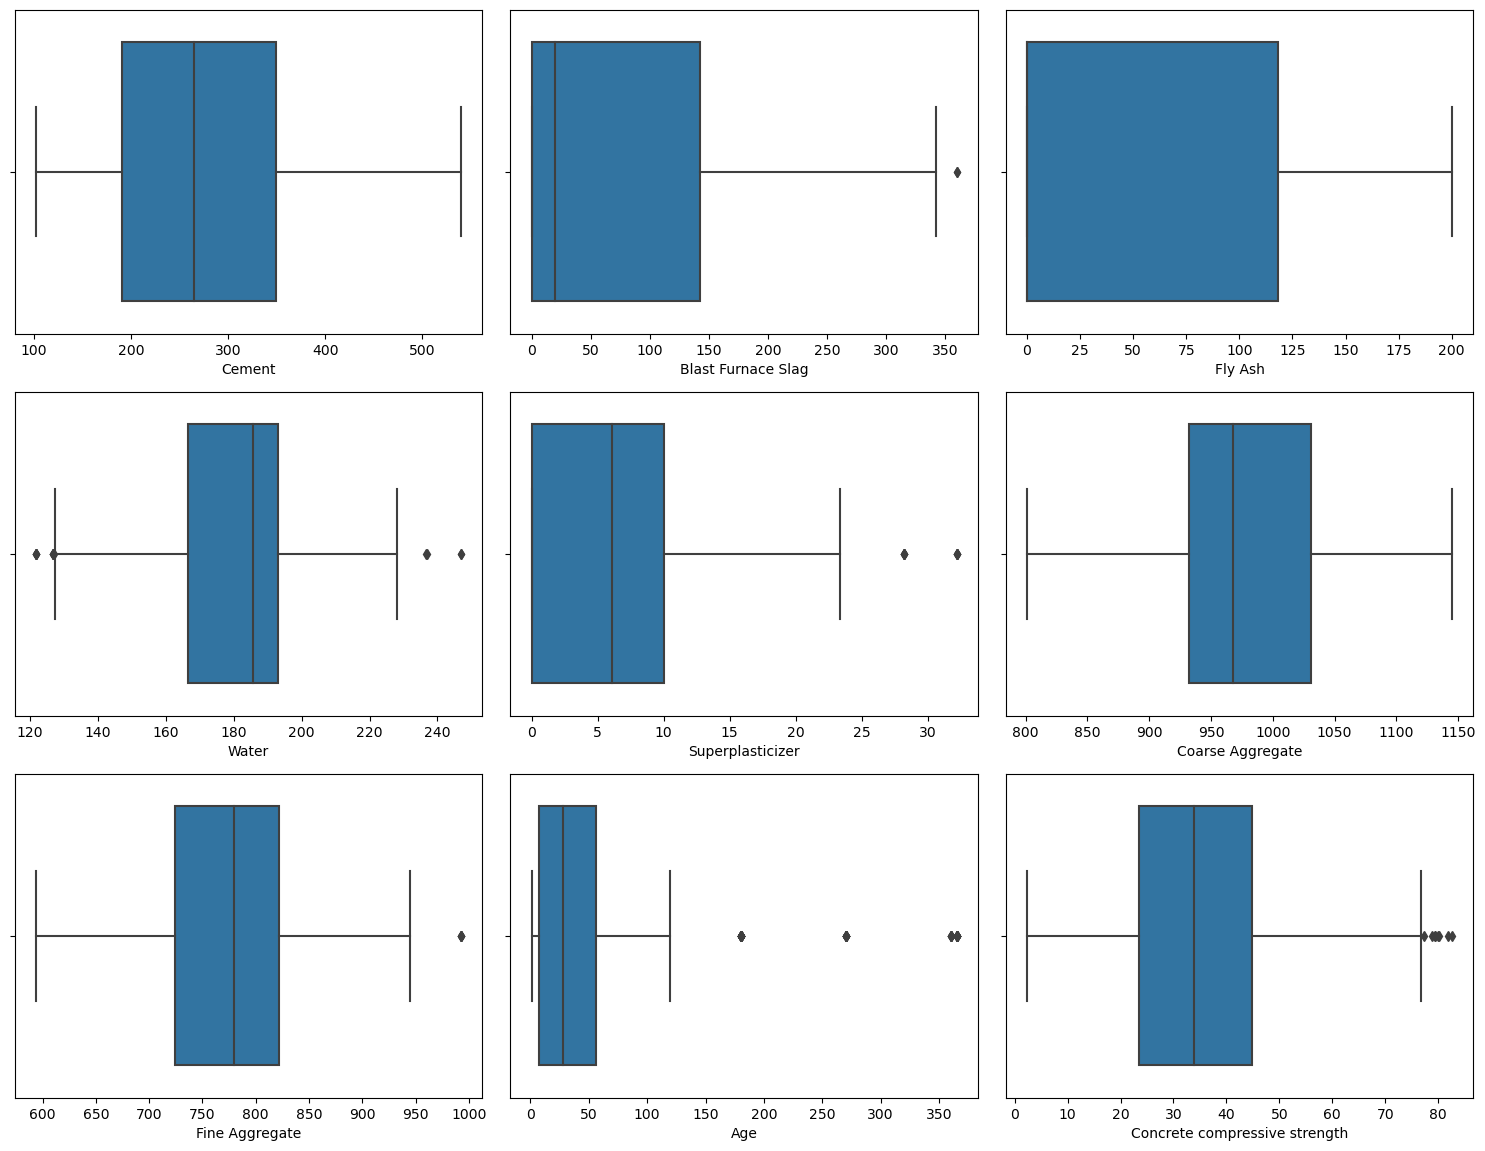

In [53]:
plt.figure(figsize=(15,15))

plotnumber=1

for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [54]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [55]:
outliers=['Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate','Age']

In [56]:
def outliers_capping(dataframe: pd.DataFrame,outlier:list):
    df=dataframe.copy()
    for i in outliers:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+(1.5*iqr)
        lower_limit=q3-(1.5*iqr)
        df.loc[df[i]>upper_limit,i]=upper_limit
        df.loc[df[i]<lower_limit,i]=lower_limit
    return df

In [57]:
df=outliers_capping(dataframe=df,outlier=outliers)

In [58]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.00,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.00,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,675.35,129.5,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,675.35,129.5,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.50,129.5,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.30,28.0,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.40,28.0,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.00,28.0,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.90,28.0,32.768036


C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anac

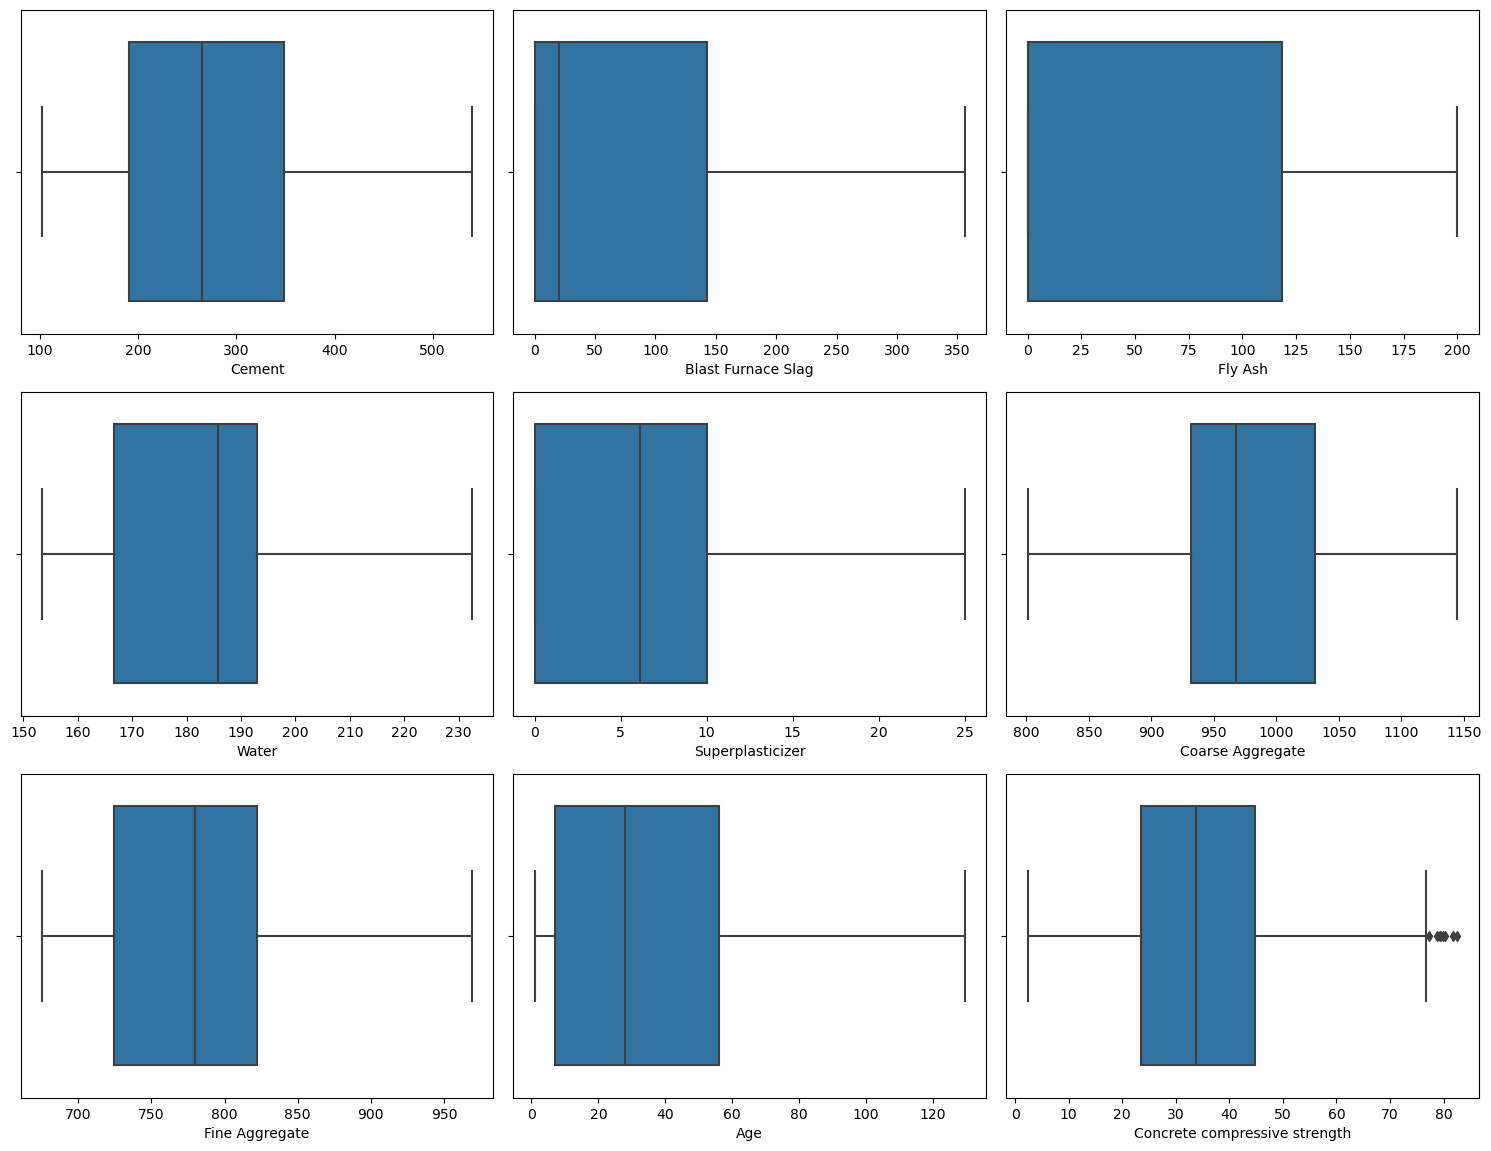

In [59]:
plt.figure(figsize=(15,15))

plotnumber=1

for i in df.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [60]:
X=df.drop('Concrete compressive strength',axis=1)
y=df['Concrete compressive strength']

C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhyuday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhy

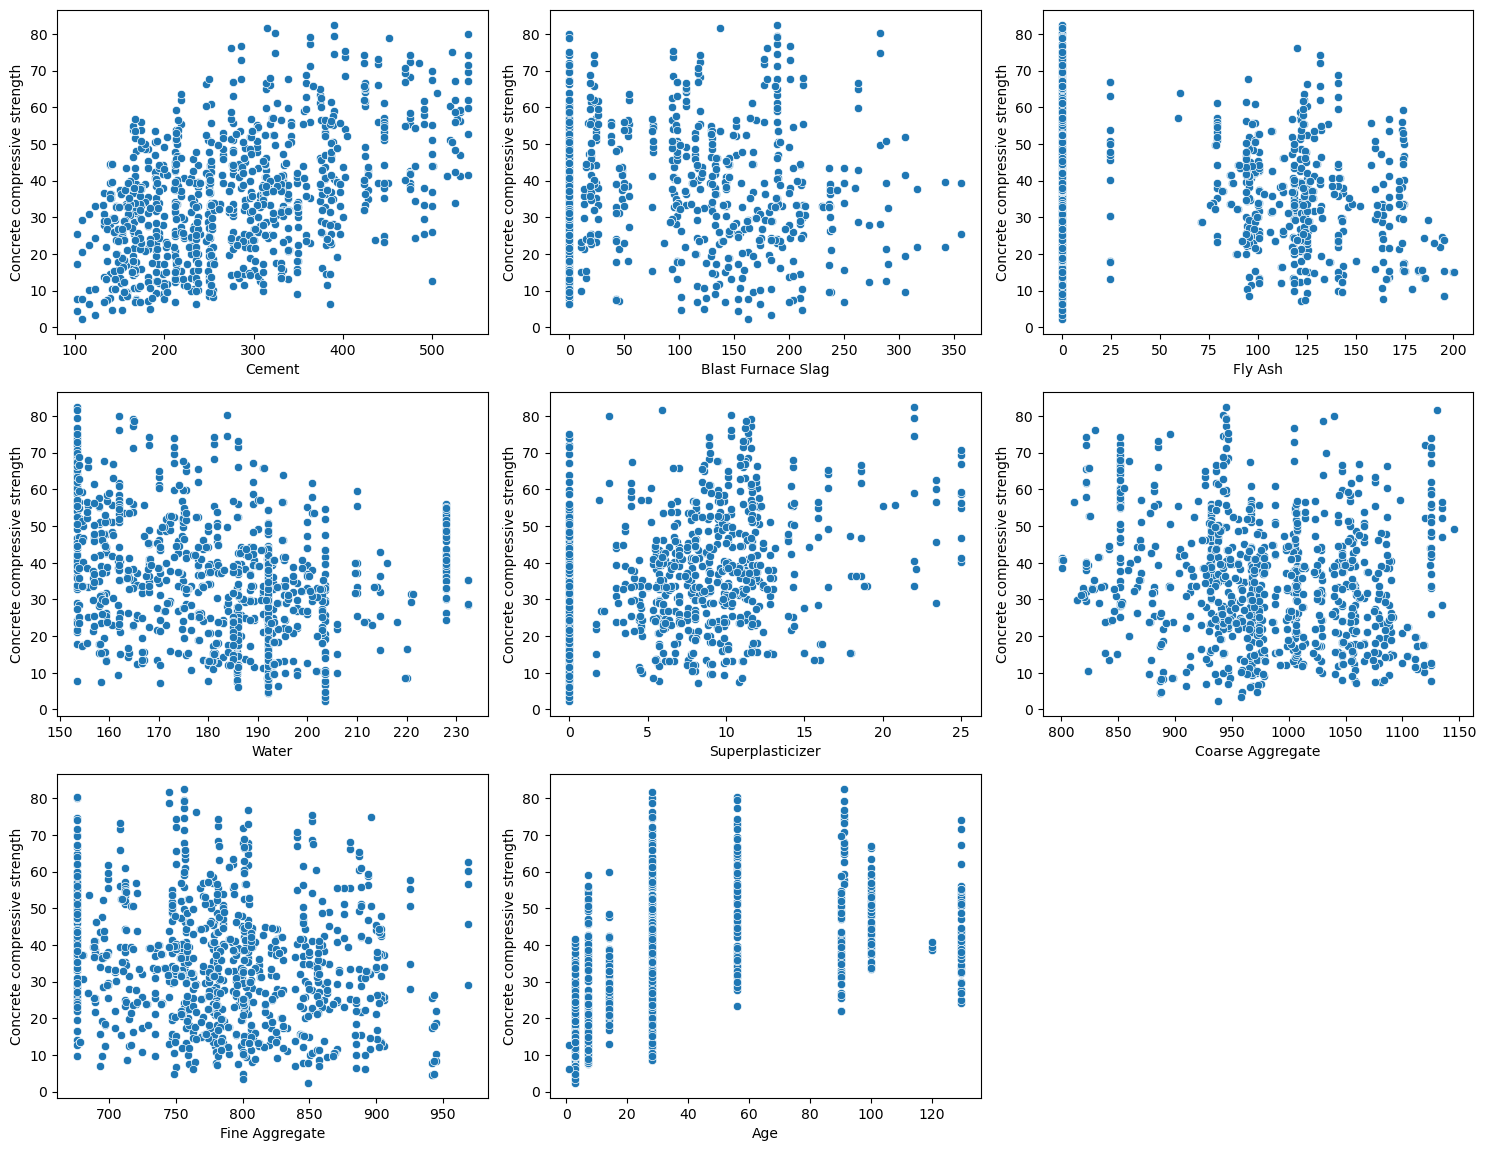

In [61]:
plt.figure(figsize=(15,15))

plotnumber=1

for i in X.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.scatterplot(X[i],y)
    plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

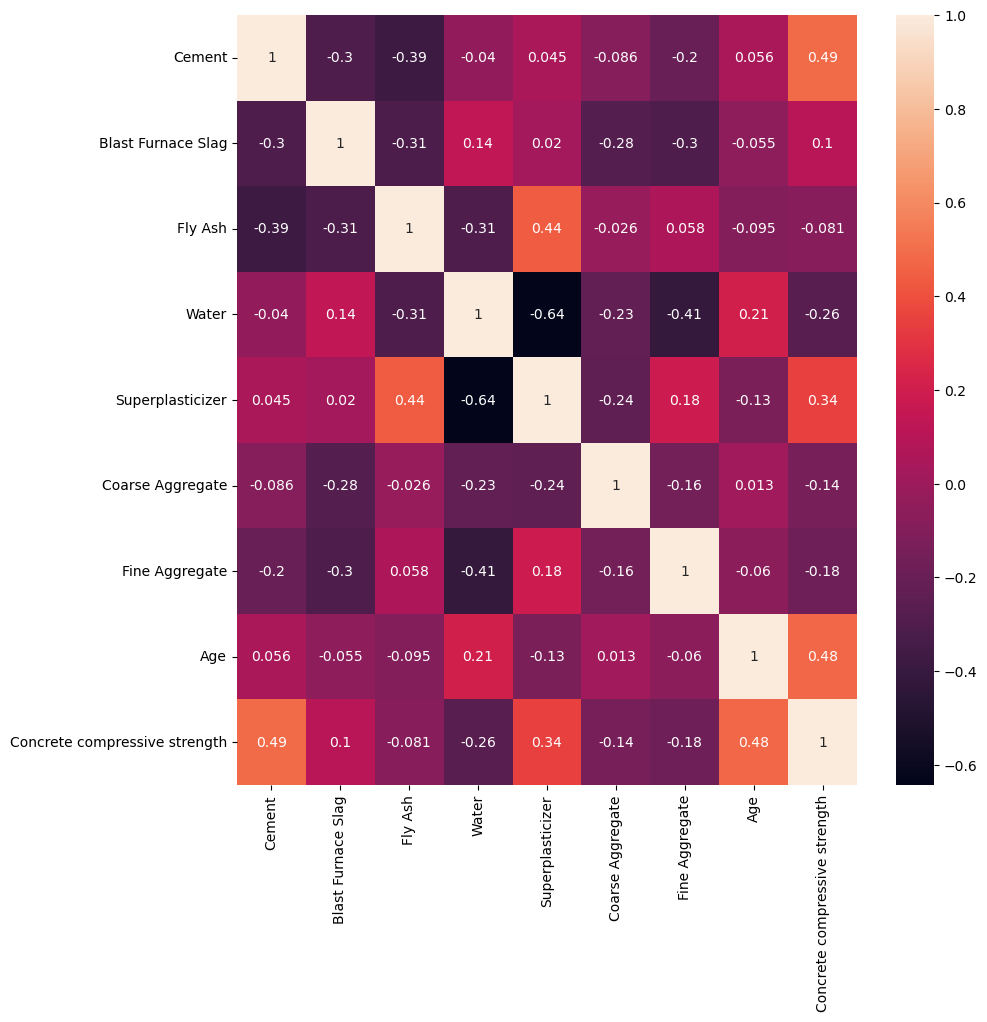

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xtrain, xtest, ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [67]:
xtrain.shape

(703, 8)

In [68]:
ytrain.shape

(703,)

In [69]:
xtest.shape


(302, 8)

In [70]:
ytest.shape

(302,)

In [73]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [74]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [77]:
from sklearn.impute import KNNImputer

In [82]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [83]:
from sklearn.pipeline import make_pipeline

In [85]:
from sklearn.metrics import mean_squared_error,r2_score

In [103]:
def check_model_performance(preprocessor,xtrain,ytrain,xtest,ytest):
    models={'Linear Regression':LinearRegression(),
            'Lasso Regresor':Lasso(alpha=1),
            'Ridge Regressor':Ridge(alpha=1),
            'RandomForest Regressor': RandomForestRegressor(max_depth=5),
            'GradientBoostingRegressor':GradientBoostingRegressor(learning_rate=0.1)
        
    }
    
    for model_name,model in models.items():
        pipeline=make_pipeline(preprocessor,model)
        pipeline.fit(xtrain,ytrain)
        y_pred=pipeline.predict(xtest)
        mae=mean_squared_error(ytest,y_pred)
        r2=r2_score(ytest, y_pred)
        print(f'{model_name}-Mean Squared Error={mae:.2f}\n{model_name}=r2 Score={r2:.2f}')

In [104]:
preprocessor_01=make_pipeline(KNNImputer(n_neighbors=3),StandardScaler())
preprocessor_02=make_pipeline(KNNImputer(n_neighbors=3),MinMaxScaler())
preprocessor_03=make_pipeline(KNNImputer(n_neighbors=3),RobustScaler())


In [105]:
print(f"{'='*10} Result for StandardScaler {'=' *10}")

========== Result for StandardScaler ==========


In [106]:
print(f"{'='*10} Result for StandardScaler {'=' *10}")
check_model_performance(preprocessor_01,xtrain,ytrain,xtest,ytest)
print(f"\n{'='*10} Result for MinMaxScaler {'=' *10}")
check_model_performance(preprocessor_01,xtrain,ytrain,xtest,ytest)
print(f"\n{'='*10} Result for Robust Scaler {'=' *10}")
check_model_performance(preprocessor_01,xtrain,ytrain,xtest,ytest)

========== Result for StandardScaler ==========
Linear Regression-Mean Squared Error=88.36
Linear Regression=r2 Score=0.69
Lasso Regresor-Mean Squared Error=100.03
Lasso Regresor=r2 Score=0.65
Ridge Regressor-Mean Squared Error=88.32
Ridge Regressor=r2 Score=0.69
RandomForest Regressor-Mean Squared Error=52.66
RandomForest Regressor=r2 Score=0.82
GradientBoostingRegressor-Mean Squared Error=34.44
GradientBoostingRegressor=r2 Score=0.88

========== Result for MinMaxScaler ==========
Linear Regression-Mean Squared Error=88.36
Linear Regression=r2 Score=0.69
Lasso Regresor-Mean Squared Error=100.03
Lasso Regresor=r2 Score=0.65
Ridge Regressor-Mean Squared Error=88.32
Ridge Regressor=r2 Score=0.69
RandomForest Regressor-Mean Squared Error=53.76
RandomForest Regressor=r2 Score=0.81
GradientBoostingRegressor-Mean Squared Error=34.45
GradientBoostingRegressor=r2 Score=0.88

========== Result for Robust Scaler ==========
Linear Regression-Mean Squared Error=88.36
Linear Regression=r2 Score=0.6

In [107]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid={'n_estimators':[100,200],
           'learning_rate':[0.1,0.01],
            'max_depth':[5,3,7],
           'min_samples_split':[2,4],
           'min_samples_leaf':[1,2,3]
           }

gb_rg=GradientBoostingRegressor()
grid=GridSearchCV(gb_rg,param_grid,scoring='neg_mean_squared_error',verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [112]:
grid.best_params_


{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [114]:
grid.best_score_

-22.24952382072831

In [119]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                          n_estimators=200)

In [121]:
grid.best_estimator_.score(xtest,ytest)

0.9238451253172678

In [123]:
ypred=grid.best_estimator_.predict(xtest)
mean_squared_error(ytest,ypred)

21.89048290302144

In [125]:
# less the error, beter the model